In [1]:
import sys
sys.path.append("./../")

In [2]:
## %load ./../rnn_model.py
#!/usr/bin/env python
'''
 Import necessary packages

'''
import tensorflow as tf
# set hardware config
#tf.debugging.set_log_device_placement(True)

cpus = tf.config.experimental.list_physical_devices(device_type='CPU')
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')

# set gpu memory grouth automatically
#for gpu in gpus:
#    tf.config.experimental.set_memory_growth(gpu, True)

if(gpus!=[]):
    # set virtal gpu/ logical gpu, create four logical gpu from a physical gpu (gpus[0])
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3072),
        tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3072),
        tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3072),
        tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3072)
        ]
        )

logical_cpus = tf.config.experimental.list_logical_devices(device_type='CPU')
logical_gpus = tf.config.experimental.list_logical_devices(device_type='GPU')
print('physical cpus and gpus: ',cpus, gpus)
print('physical cpus number: ', len(cpus))
print('physical cpgs number: ', len(gpus))
print('logical cpus and gpus: ',logical_cpus, logical_gpus)
print('logical cpgs number: ', len(logical_gpus))


from estimation_study import *
from estimation_assessment.scores import *


physical cpus and gpus:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')] []
physical cpus number:  1
physical cpgs number:  0
logical cpus and gpus:  [LogicalDevice(name='/device:CPU:0', device_type='CPU')] []
logical cpgs number:  0
tensorflow version: 2.5.0
tensorflow version: 2.5.0
[LogicalDevice(name='/device:CPU:0', device_type='CPU')] []


In [3]:
combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/2022-04-27/143322/testing_result_folders.txt"
combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/training_testing/matpool_trained_data_1/testing_result_folders.txt"
#pd_assessment = get_testing_metrics(combination_investigation_results)



combination_investigation_metrics = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/2022-04-30/all_sensor_list/all_sensor_configs_metrics.csv"
combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/valid_results/testing_result_folders.txt"
combination_investigation_metrics = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/valid_results/metrics.csv"


In [13]:
combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/valid_results/all_sensors_lstm_units/all_sensors_lstm_units_testing_result_folders.txt"
combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/2022-05-09/094720/off_on_synchronizationtesting_result_folders.txt"
pd_assessment = get_testing_metrics(combination_investigation_results)

In [14]:
pd_assessment.head(30)

,metrics,fields,scores,Sensor configurations,LSTM units,syn_features_labels,landing_manners,estimated_variables,Test ID
0,r2,L_KNEE_MOMENT_X,0.913,FSTWC,35,False,single_leg_R,['L_KNEE_MOMENT_X'],test_094439
1,rmse,L_KNEE_MOMENT_X,0.346,FSTWC,35,False,single_leg_R,['L_KNEE_MOMENT_X'],test_094439
2,mae,L_KNEE_MOMENT_X,0.235,FSTWC,35,False,single_leg_R,['L_KNEE_MOMENT_X'],test_094439
3,r_rmse,L_KNEE_MOMENT_X,0.082,FSTWC,35,False,single_leg_R,['L_KNEE_MOMENT_X'],test_094439


In [18]:
combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/2022-05-06/230432/off_on_synchronizationtesting_result_folders.txt"
#pd_assessment = get_testing_metrics(combination_investigation_results)
combination_investigation_metrics = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/2022-05-06/230432/metrics.csv"

def plot_features_labels_synchronization_results(combination_investigation_metrics):
    
    #1) load assessment metrics
    pd_assessment = pd.read_csv(combination_investigation_metrics)
    r2_metrics = pd_assessment.loc[pd_assessment['metrics']=='r2']

    #3) plot
    # i) plot configurations
    figsize=(13,6)
    fig = plt.figure(figsize=figsize,constrained_layout=False)
    gs1=gridspec.GridSpec(2,4)#13
    gs1.update(hspace=0.25,wspace=0.34,top=0.95,bottom=0.12,left=0.06,right=0.95)
    axs=[]
    axs.append(fig.add_subplot(gs1[0, 0:2]))
    axs.append(fig.add_subplot(gs1[0, 2:4]))
    axs.append(fig.add_subplot(gs1[1, 0:2]))
    axs.append(fig.add_subplot(gs1[1, 2:4]))
    
    #ii) plot colors
    colors =  sns.color_palette("Paired")
    colors = sns.color_palette("YlGnBu")
    #colors = sns.cubehelix_palette(start=.5, rot=-.5)

,metrics,fields,scores,Sensor configurations,LSTM units,syn_features_labels,Test ID
3,r_rmse,L_GRF_Z,0.136,FSTWC,35,True,test_230215
0,r2,L_GRF_Z,0.688,FSTWC,35,True,test_230342
1,rmse,L_GRF_Z,0.229,FSTWC,35,True,test_230342
2,mae,L_GRF_Z,0.183,FSTWC,35,True,test_230342
3,r_rmse,L_GRF_Z,0.131,FSTWC,35,True,test_230342


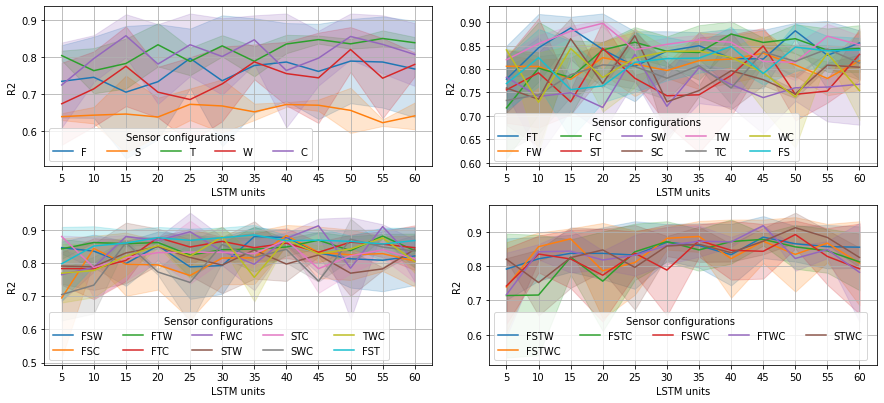

In [15]:
def plot_sensorconfig_modelsize_investigation_results(combination_investigation_metrics):
    #1) load assessment metrics
    pd_assessment = pd.read_csv(combination_investigation_metrics)
    r2_metrics = pd_assessment.loc[pd_assessment['metrics']=='r2']

    #3) plot
    # i) plot configurations
    figsize=(13,6)
    fig = plt.figure(figsize=figsize,constrained_layout=False)
    gs1=gridspec.GridSpec(2,4)#13
    gs1.update(hspace=0.25,wspace=0.34,top=0.95,bottom=0.12,left=0.06,right=0.95)
    axs=[]
    axs.append(fig.add_subplot(gs1[0, 0:2]))
    axs.append(fig.add_subplot(gs1[0, 2:4]))
    axs.append(fig.add_subplot(gs1[1, 0:2]))
    axs.append(fig.add_subplot(gs1[1, 2:4]))
    
    #ii) plot colors
    colors =  sns.color_palette("Paired")
    colors = sns.color_palette("YlGnBu")
    #colors = sns.cubehelix_palette(start=.5, rot=-.5)
    
    #iii) sensor configurations
    
    single_imu = ['T','S','F','W','C']
    double_imus = ['FS','FT','FW','FC','ST','SW','SC','TW','TC','WC']
    triad_imus = ['FST','FSW','FSC','FTW','FTC','FWC','STW','STC','SWC','TWC']
    quad_imus = ['FSTW','FSTC','FSWC','FTWC','STWC','FSTWC']
    
    
    #iv) plotting
    for idx, imu_config in enumerate([single_imu, double_imus, triad_imus, quad_imus]):
        x='LSTM units'; y = 'scores'
        displayed_data = r2_metrics.loc[r2_metrics['Sensor configurations'].isin(imu_config)]
        hue_plot_params = {
            'data': displayed_data,
            'x': x,
            'y': y,
            "hue":  "Sensor configurations",
            "color": colors[idx]
            }
        #pdb.set_trace()
        g = sns.lineplot(ax=axs[idx], **hue_plot_params)
        axs[idx].set_xlabel('LSTM units')
        axs[idx].set_ylabel('R2')
        axs[idx].grid(visible=True, axis='both',which='major')
        axs[idx].set_xticks([5,10,15,20,25,30,35,40,45,50,55,60])
        axs[idx].legend(ncol= 5+0*len(axs[idx].legend().get_texts()),title='Sensor configurations',loc='best')
        

#combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/2022-04-27/143322/testing_result_folders.txt"
#pd_assessment = get_testing_metrics(combination_investigation_results)
combination_investigation_metrics = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/2022-04-27/143322/metrics.csv"
combination_investigation_metrics = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/valid_results/all_sensors_lstm_units/metrics.csv"
combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/2022-05-09/094720/off_on_synchronizationtesting_result_folders.txt"
#combination_investigation_metrics = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/2022-04-30/all_sensor_list/all_sensor_configs_metrics.csv"
plot_sensorconfig_modelsize_investigation_results(combination_investigation_metrics)

In [30]:
combination_investigation_metrics = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/2022-04-30/all_sensor_list/all_sensor_configs_metrics.csv"
combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/valid_results/testing_result_folders.txt"
combination_investigation_metrics = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/valid_results/metrics.csv"
#pd_assessment = get_testing_metrics(combination_investigation_results)


combination_investigation_metrics = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/2022-04-30/all_sensor_list/all_sensor_configs_metrics.csv"
combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/valid_results/testing_result_folders.txt"

combination_investigation_metrics = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/valid_results/metrics.csv"
pd_assessment = get_testing_metrics(combination_investigation_results)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


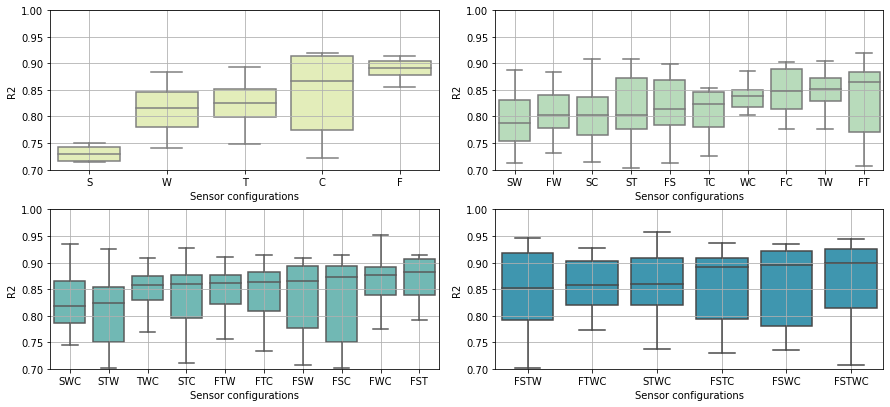

In [8]:


def plot_sensor_config_investigation_results(combination_investigation_metrics):
    #1) load assessment metrics
    pd_assessment = pd.read_csv(combination_investigation_metrics)
    r2_metrics = pd_assessment.loc[pd_assessment['metrics']=='r2']
    # drop some cases (test)
    r2_metrics = r2_metrics.drop(r2_metrics[r2_metrics['scores']<0.7].index)
    #2) add average scores of each sensor configurations
    r2_metrics['average scores'] = 0.0
    mean_scores_of_sensors = r2_metrics.groupby('Sensor configurations').median()
    for sensor_config in list(set(r2_metrics['Sensor configurations'])):
        r2_metrics.loc[r2_metrics['Sensor configurations']==sensor_config,'average scores'] = mean_scores_of_sensors.loc[sensor_config, 'scores']

    # sort value
    r2_metrics.sort_values(by='average scores',ascending=True,inplace=True)
    #r2_metrics.sort_values(by=['scores'],ascending=[True],inplace=True)

    
    #3) plot
    # i) plot configurations
    figsize=(13,6)
    fig = plt.figure(figsize=figsize,constrained_layout=False)
    gs1=gridspec.GridSpec(2,4)#13
    gs1.update(hspace=0.25,wspace=0.34,top=0.95,bottom=0.12,left=0.06,right=0.95)
    axs=[]
    axs.append(fig.add_subplot(gs1[0, 0:2]))
    axs.append(fig.add_subplot(gs1[0, 2:4]))
    axs.append(fig.add_subplot(gs1[1, 0:2]))
    axs.append(fig.add_subplot(gs1[1, 2:4]))
    
    #ii) plot colors
    colors =  sns.color_palette("Paired")
    colors = sns.color_palette("YlGnBu")
    #colors = sns.cubehelix_palette(start=.5, rot=-.5)
    
    #iii) sensor configurations
    single_imu = ['T','S','F','W','C']
    double_imus = ['FS','FT','FW','FC','ST','SW','SC','TW','TC','WC']
    triad_imus = ['FST','FSW','FSC','FTW','FTC','FWC','STW','STC','SWC','TWC']
    quad_imus = ['FSTW','FSTC','FSWC','FTWC','STWC','FSTWC']
    
    for idx, imu_config in enumerate([single_imu, double_imus, triad_imus, quad_imus]):
        x='Sensor configurations'; y = 'scores'
        displayed_data = r2_metrics.loc[r2_metrics['Sensor configurations'].isin(imu_config)]
        hue_plot_params = {
            'data': displayed_data,
            'x': x,
            'y': y,
            "showfliers": False,
            "color": colors[idx]
            }
        g = sns.boxplot(ax=axs[idx], **hue_plot_params)
        g.set_xlabel('Sensor configurations')
        g.set_ylabel('R2')
        g.grid(visible=True, axis='both',which='major')
        g.set_ylim(0.7,1.0)
        g.legend(ncol=3,title='Sensor configurations',loc='lower right')
        g.get_legend().remove()

plot_sensor_config_investigation_results(combination_investigation_metrics)

<ceter> 
Figure. R2 of the left leg GRF ($Fz$) estimation with different IMU configurations in double-leg drop landing. The IMU configurations are namely by the IMU palcement on segments. It includes five segments: F (left foot), S (left shank), T (left thigh), W (waist), and C (chest). There are 31 ways to to configue the five IMUs' placement in total. Here, the IMU configurations are categoried as five classes: single IMU, double IMUs, triad IMUs, quaternary IMUs and full IMUs, whose estimation performances are described in the four subplots. 

#### Results:
1. The maximum R2 values of the estimation in the five classes are with the IMU configurations: T (trunk), FT (foot and trunk), FTC (foot, trunk, and chest), FTCW (foot, trunk, chest, and waist), and FSTWC (foot, shank, trunk, waist, and chest).
2. The more IMUs employed, the greater estimation accuracy.
3. The IMU placement has significant influences on the estimation accuracy.
4. Some four IMU configurations (FSWC, FSTC, and FTWC) have similar estimation accuracies and their accuraies are colosed with the that of the full IMU configuration.
    
</center>

In [42]:
combination_investigation_results = "/media/sun/DATA/Drop_landing_workspace/suntao/Results/Experiment_results/investigation/2022-05-06/153846/off_on_synchronizationtesting_result_folders.txt"
pd_assessment = get_testing_metrics(combination_investigation_results)

In [44]:
pd_assessment.head()

,metrics,fields,scores,Sensor configurations,LSTM units,Test ID
0,r2,L_GRF_Z,0.932,FSTWC,35,test_152950
1,rmse,L_GRF_Z,0.158,FSTWC,35,test_152950
2,mae,L_GRF_Z,0.128,FSTWC,35,test_152950
3,r_rmse,L_GRF_Z,0.061,FSTWC,35,test_152950
0,r2,L_GRF_Z,0.833,FSTWC,35,test_153055


In [81]:
XX=[('1','2','3','4'),('5','6','7','abcsd')]

In [78]:
w

[(1, 2, 3, 4), 'w']

In [83]:
with open('./ttt.txt','w') as fd:
    for x in XX:
        #y = [str(i) for i in x]
        fd.write('\t'.join(x)+'\n')

In [74]:
w=XX[:-1]+['w']

In [73]:
print(w)

[(1, 2, 3, 4), 'w']
